In [1]:
import numpy as np
import pandas as pd
from scipy import stats, signal
from matplotlib.pyplot import *

%matplotlib inline

In [2]:
def get_mag(d):
    return d.emg - np.mean(d.emg)

821.9
205.475


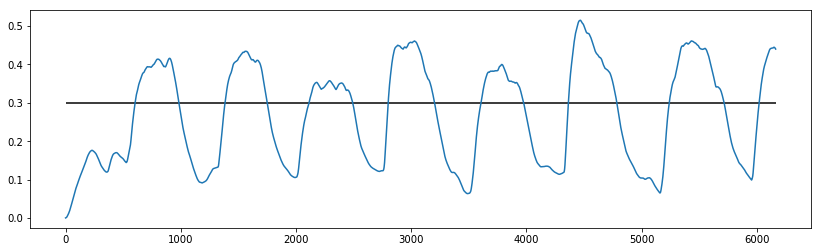

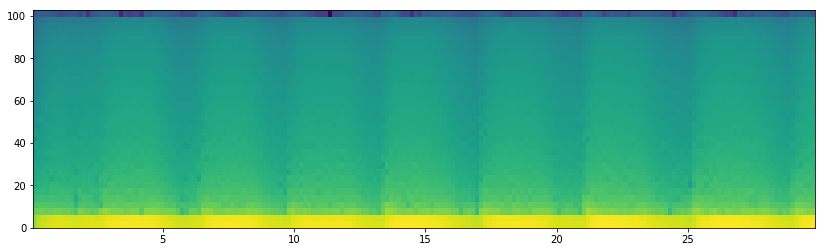

In [51]:
d = pd.read_csv('../data_emg/flex.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print(Fs)
down = 4
print(Fs/down)
mag = get_mag(d)
mag = mag[::down]
#mag = mag - np.mean(mag)
x = mag
b, a = signal.butter(1, 90/(Fs/(2*down)), btype='high')
mag = signal.lfilter(b, a, mag)

b2, a2 = signal.butter(2, 0.5/(Fs/(2*down)), btype='low')
mag = signal.lfilter(b2,a2,np.abs(mag))
# mag = np.abs(signal.hilbert(mag))
# mag = np.abs(mag)

figure(figsize=(14,4))
plot(mag)
hlines(0.3, 0, len(mag))

figure(figsize=(14,4))
_ = specgram(mag, NFFT=64, noverlap=32, Fs=Fs/down)


In [62]:
freqs = np.arange(200,800,10)
bbs = []
aas = []
for f in freqs:
    b, a = signal.butter(1, 90/(f/2), btype='high')
    bbs.append(b)
    aas.append(a)

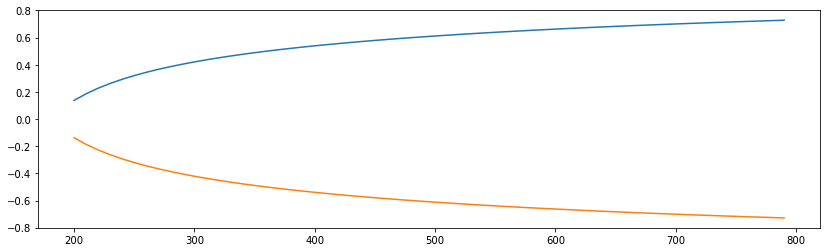

In [66]:
figure(figsize=(14,4))
plot(freqs, bbs)

In [67]:
signal.butter?

In [25]:
150/(Fs/down)


0.54753406878650224

In [14]:
b2,a2

(array([  3.26112508e-05,   6.52225016e-05,   3.26112508e-05]),
 array([ 1.        , -1.98378282,  0.98391326]))

In [ ]:
signal.lfilter?

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7222: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


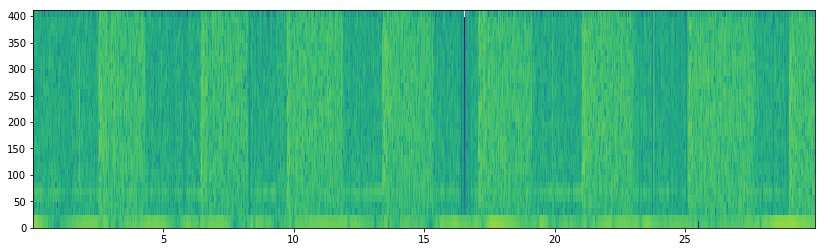

In [37]:
d = pd.read_csv('../data_emg/flex.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
x = get_mag(d)
figure(figsize=(14,4))
_ = specgram(x, NFFT=64, noverlap=32, Fs=Fs,vmax=20)

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7222: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


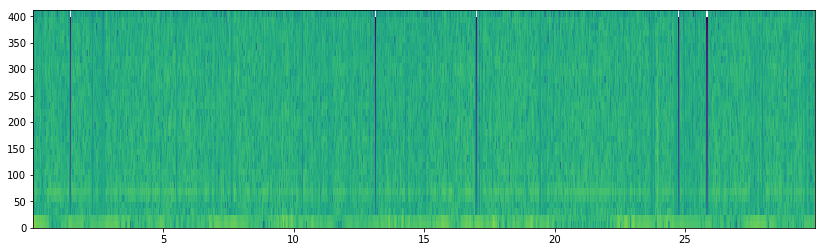

In [39]:
d = pd.read_csv('../data_emg/false_belly.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
x = get_mag(d)
figure(figsize=(14,4))
_ = specgram(x, NFFT=64, noverlap=32, Fs=Fs,vmax=20)

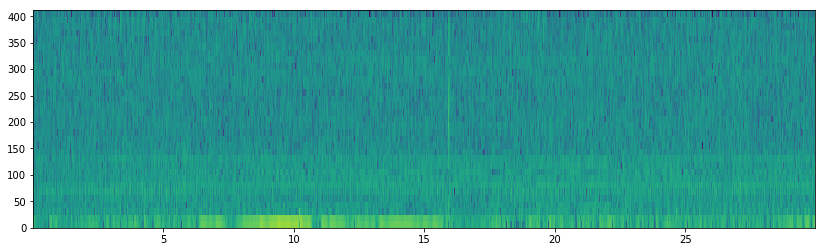

In [40]:
d = pd.read_csv('../data_emg/false_drive.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
x = get_mag(d)
figure(figsize=(14,4))
_ = specgram(x, NFFT=64, noverlap=32, Fs=Fs,vmax=20)